# Temperature data combine file 

In [258]:
import pandas as pd 
from tqdm import tqdm

In [259]:
devicePath = 'measurements\BandGapCurve\Device1'
test_data = pd.read_csv('measurements\BandGapCurve\Device3\BandgapCurve_125C.csv')
data = pd.DataFrame()
# data['125'] = test_data['BandGapValue']
import os 
from os import listdir
from os.path import isfile, join
import re 
datafiles = {int(re.findall(r'[+-]?[0-9]+',f)[0]):f for f in listdir(devicePath) if isfile(join(devicePath, f)) if re.match('BandgapCurve_', f )}
# [ filename for filename in onlyfiles if re.match('BandgapCurve_', filename )]
datafiles = dict(sorted(datafiles.items()))
datafiles

{-40: 'BandgapCurve_-40C.csv',
 -30: 'BandgapCurve_-30C.csv',
 -20: 'BandgapCurve_-20C.csv',
 -10: 'BandgapCurve_-10C.csv',
 0: 'BandgapCurve_0C.csv',
 10: 'BandgapCurve_10C.csv',
 20: 'BandgapCurve_20C.csv',
 30: 'BandgapCurve_30C.csv',
 40: 'BandgapCurve_40C.csv',
 50: 'BandgapCurve_50C.csv',
 60: 'BandgapCurve_60C.csv',
 70: 'BandgapCurve_70C.csv',
 80: 'BandgapCurve_80C.csv',
 90: 'BandgapCurve_90C.csv',
 100: 'BandgapCurve_100C.csv',
 110: 'BandgapCurve_110C.csv',
 120: 'BandgapCurve_120C.csv',
 125: 'BandgapCurve_125C.csv'}

In [260]:
for temperature, file in tqdm(datafiles.items()):
    tempdata = pd.read_csv(os.path.join(devicePath, file))
    data[temperature] = tempdata['BandGapValue']
    # data[f'error_percentage@{temperature}C'] = tempdata['error_percentage']

100%|██████████| 18/18 [00:00<00:00, 375.99it/s]


In [261]:
data.index = [f'{i}c' for i  in data.index]
data['min'] = data.min(axis=1)
data['max'] = data.max(axis=1)
data['delta'] = data['max']-data['min']
data['delta_min'] = data['delta'].min()
data['delta - delta_min'] = data['delta'] - data['delta_min']

data = data.transpose()
data.index.name = 'temperature'
data.to_csv(os.path.join(devicePath,'BandgapCurve.csv'))

In [27]:
import json 

with open('trimvalues/chip_data.json', 'r') as file:
    trimData = json.load(file)

In [28]:
import json 
import pandas as pd 
with open('measurements/Char/FRO/bandgap.json', 'r') as file :
    data=json.load(file)
    bandgap_Voltages=[bandgap.get('bandgap') for bandgap in data.values()]
    data = pd.DataFrame(data=bandgap_Voltages, index=data.keys())
    data=data.transpose()
    data.to_csv('measurements/Char/FRO/bandgap.csv')


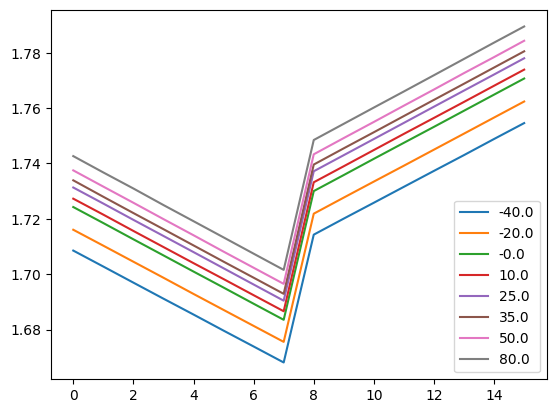

In [29]:
import matplotlib.pyplot as plt 
plt.plot(data)
plt.legend(data.columns.to_list())
plt.show()

In [31]:
with open('measurements/Char/FRO/froChar.json', 'r') as file :
    frodata=json.load(file)

In [32]:
fro = [fro.get('fro') for fro in frodata.values()]
temperature = frodata.keys()
pd.DataFrame(data={'temperature':temperature,'bandgap_Voltages': data.iloc[0],'fro':fro }).to_csv('measurements/Char/FRO/froChar.csv')